# Ερωτηση 3 | 3.Δ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
import datetime as datetime
import seaborn as sns
import scipy as sp 
from scipy import stats
from math import floor
%matplotlib inline

In [2]:
df_bus = pd.read_csv("business.csv") # Businesses Dataframe
df_rev = pd.read_csv('reviews.csv') # Reviews Dataframe
df_rev_copy = df_rev    # used for Attire categorization
print(df_bus.shape)
df_rev.shape

(11070, 15)


(881973, 9)

## Categorization based on the Price

In [3]:
df_res = df_bus[df_bus['categories'].str.contains('Restaurants')] # businesses that are Restaurants
df_res.reset_index(drop=True, inplace=True)
df_res.to_csv("restaurants.csv")    # We save the results on a csv file to use for Exercise 3.E
df_res_copy = df_res    # used for Attire categorization
print(df_res.shape)
df_res[0:3]

(4829, 15)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."


In [4]:
def find_range(a):
    try:
         return eval(a)["RestaurantsPriceRange2"]
    except:
        pass
    try:
        return eval(a)["RestaurantPriceRange2"]
    except:
        pass

In [5]:
df_res["price_range"] = df_res.attributes.apply(find_range)
df_res.dropna(subset=['price_range'], inplace=True)
print(df_res.shape)
df_res.head()

(4123, 16)


C:\Users\Giannis\AppData\Local\Temp/ipykernel_25204/376711067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["price_range"] = df_res.attributes.apply(find_range)
C:\Users\Giannis\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price_range
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",2
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",2
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",1


Παραπανω, φιλτραρουμε τα εστιατορια για να βρουμε αυτα που εχουν στα attributes το RestaurantPriceRange.

In [6]:
def categorize_range(range):
    try:
        if int(range) < 3:
            return "Cheap"
        return "Expensive"
    except:
        return
    

In [7]:
df_res["price_type"] = df_res["price_range"].apply(categorize_range)
print(df_res.shape)
df_res[["business_id", "price_range", "price_type"]].head()

(4123, 17)


C:\Users\Giannis\AppData\Local\Temp/ipykernel_25204/1416425547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["price_type"] = df_res["price_range"].apply(categorize_range)


,business_id,price_range,price_type
0,MTSW4McQd7CbVtyjqoe9mw,1,Cheap
1,MUTTqe8uqyMdBl186RmNeA,2,Cheap
2,ROeacJQwBeh05Rqg7F6TCg,1,Cheap
3,QdN72BWoyFypdGJhhI5r7g,2,Cheap
4,Mjboz24M9NlBeiOJKLEd_Q,1,Cheap


Στην συνεχεια, θα κανουμε join τις επιχειρησεις με τα reviews για να εχουμε προσβαση στα stars

In [8]:
df_res.dropna(subset=['stars'], inplace=True)
df_res.dropna(subset=['price_type'], inplace=True)
print(df_res.shape)
df_res.head()

(4122, 17)


C:\Users\Giannis\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price_range,price_type
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1,Cheap
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",2,Cheap
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,Cheap
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",2,Cheap
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",1,Cheap


Number of cheap restaurants: 3882
Number of excepensive restaurants: 240


<AxesSubplot:xlabel='price_type', ylabel='stars'>

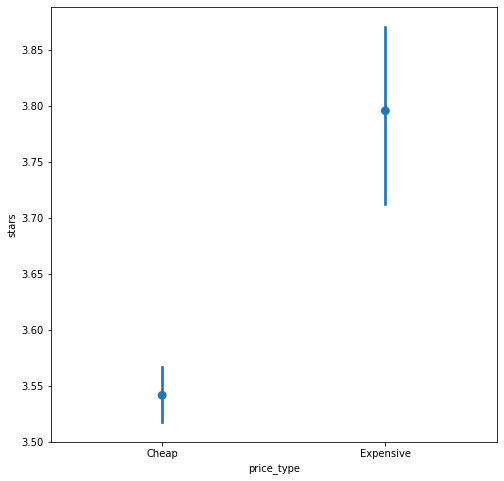

In [9]:
print("Number of cheap restaurants:", len(df_res[df_res.price_type == "Cheap"]))
print("Number of excepensive restaurants:", len(df_res[df_res.price_type == "Expensive"]))
plt.figure(figsize=(8, 8))
sns.pointplot(data=df_res, x = "price_type", y = "stars", ci= 95, join=False)

Μπορουμε να πουμε με μεγαλη βεβαιτοτητα οτι τα ακριβα εστιατορια εχουν καλυτερες κριτικες με διαφορα της ταξης του 0.20 αστερια. Επισης, το error bar στα expensive εστιατορια ειναι αρκετα μεγαλο επειδη εχουμε μονο 240 ακριβα εστιατορια, ενω εχουμε 3882 φθηνα εστιατορια και το error bar ειναι πιο σιγουρο.

In [10]:
cheap_stars = df_res[df_res['price_type'] == 'Cheap']['stars']
expensive_stars = df_res[df_res['price_type'] == 'Expensive']['stars']

stats.ttest_ind(cheap_stars, expensive_stars)

Ttest_indResult(statistic=-4.992758742426228, pvalue=6.198456768736231e-07)

Μπορουμε να δουμε πως το pvalue ειναι πολυ μικρο και αυτο δειχνει οτι τα συμπερασματα μας ειναι στατιστικος σημαντικα.

## Categorization based on the Attire

In [11]:
df_res = df_res_copy
print(df_res.shape)
df_res.head()

(4122, 17)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price_range,price_type
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1,Cheap
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",2,Cheap
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,Cheap
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",2,Cheap
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",1,Cheap


In [12]:
eval(df_res.attributes[1])["RestaurantsAttire"].strip("'")

'casual'

In [13]:
def get_attire(a):
    try:
        tmp = eval(a)["RestaurantsAttire"]
        tmp = tmp.strip("'") if (tmp[0] != 'u') else tmp[1:].stip("'")
        if tmp == "dressy":
            tmp = "formal"
        return tmp
    except:
        pass

Με την παραπανω συναρτηση βρισκω το restaurant attire, κανω clean την μορφη του(υπηρχαν u"casual" και επιπλεον '') και αντικαθιστω τα dressy types σε formal, για να εχουμε δυο κατηγοριες formal, casual.

In [14]:
df_res["attire"] = df_res.attributes.apply(get_attire)
df_res.dropna(subset=['attire'], inplace=True)
print(df_res.shape)
df_res[["business_id", "attire"]].head()

(1511, 18)


C:\Users\Giannis\AppData\Local\Temp/ipykernel_25204/3924162056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["attire"] = df_res.attributes.apply(get_attire)
C:\Users\Giannis\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,business_id,attire
1,MUTTqe8uqyMdBl186RmNeA,casual
3,QdN72BWoyFypdGJhhI5r7g,casual
7,3BJxm-HnvzdwD1zjmSbmyQ,casual
8,WYYdQDjx-DsCanlP0DpImQ,casual
10,bTve2mwLk5Zc01vRKqc2KQ,casual


In [15]:
df_res_rev = df_rev_copy.groupby(by="business_id")["stars"].mean()
print(df_res_rev.shape)
df_res_rev.head()


(11070,)


business_id
--OS_I7dnABrXvRCCuWOGQ    4.200000
-0M0b-XhtFagyLmsBtOe8w    3.722222
-0PN_KFPtbnLQZEeb23XiA    3.363636
-0TffRSXXIlBYVbb5AwfTg    4.351083
-0eUa8TsXFFy0FCxHYmrjg    3.964286
Name: stars, dtype: float64

In [16]:
df_rev = df_rev.merge(df_res_rev, on="business_id")
df_res.dropna(subset=['stars'], inplace=True)
print(df_res.shape)
df_res.head()

(1511, 18)


C:\Users\Giannis\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price_range,price_type,attire
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",2,Cheap,casual
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",2,Cheap,casual
7,10,3BJxm-HnvzdwD1zjmSbmyQ,Golden Chopstick Chinese Restaurant,1800 Spring Garden St,Philadelphia,PA,19130.0,39.963078,-75.168027,3.0,137,1,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Restaurants, Chinese","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:30',...",1,Cheap,casual
8,13,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107.0,39.947033,-75.157434,4.5,72,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...",2,Cheap,casual
10,19,bTve2mwLk5Zc01vRKqc2KQ,Red Hook Coffee & Tea,765 S 4th St,Philadelphia,PA,19147.0,39.938552,-75.149636,4.5,183,1,"{'BikeParking': 'True', 'OutdoorSeating': 'Tru...","Restaurants, Breakfast & Brunch, Vegan, Bagels...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...",1,Cheap,casual


Number of restaurants that require formal attire: 42
Number of restaurants that require casual attire: 1469


<AxesSubplot:xlabel='attire', ylabel='stars'>

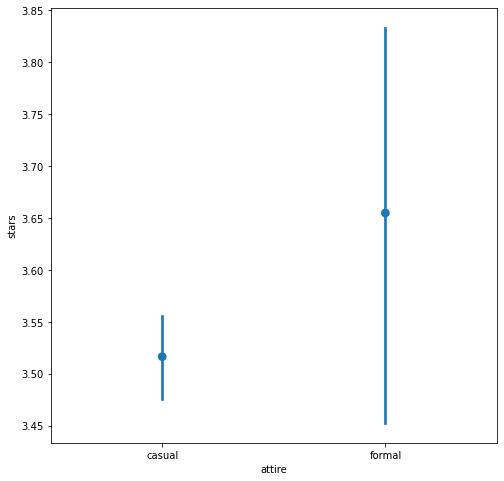

In [17]:
print("Number of restaurants that require formal attire:", len(df_res[df_res.attire == "formal"]))
print("Number of restaurants that require casual attire:", len(df_res[df_res.attire == "casual"]))
plt.figure(figsize=(8, 8))
sns.pointplot(data=df_res, x = "attire", y = "stars", ci= 95, join=False)

Μπορουμε να παρατηρησουμε πως τα καταστηματα που απαιτουν επισημη ενδημασια εχουν περισοτερα αστερια απο αυτα που απαιτου καθημερινη ενδημασια. Ομως, εχουμε μονο 42 formal εστιατορια, για αυτο και το διαστημα εμπιστοσυνης τους εχει αρκετα μεγαλο range, ενω των casual εχει μικροτερο range. Εχουμε και overlap μεταξυ των error bars και τα formal ετσιατορια θα μπορουσαν να εχουν λιγοτερα αστερια απο τα casual εστιατορια σε μεγαλυτερο δειγμα. 

In [18]:
casual_stars = df_res[df_res['attire'] == 'casual']['stars']
formal_stars = df_res[df_res['attire'] == 'formal']['stars']

stats.ttest_ind(casual_stars, formal_stars)

Ttest_indResult(statistic=-1.1464018695638065, pvalue=0.25181066000778646)

To p-value δεν ειναι μικροτερο του 0.05 και αυτο δειχνει οτι η παρατησρηση μας δεν ειναι στατιστικα σημαντικη αφου τα αποτελεσματα θα μπορουσαν να δημιουργηθουν και τυχαια απο ανεξαρτητες μεταβλητες.